In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15})

In [3]:
df_train = pd.read_csv("TS_X_train_reduced.csv")

In [4]:
df_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,32422,32423,32424,32425,32426,32427,32428,32429,32430,32431
0,0,-6.522588e-09,-6.214034e-08,1.556426e-07,-2.865991e-07,4.943511e-07,-9.538162e-07,4.076188e-06,2.361484e-06,-1.497017e-06,...,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07
1,1,-4.039391e-06,-1.736967e-06,-2.901299e-06,-1.339160e-05,-9.244283e-06,7.533309e-07,-3.758562e-06,-3.376192e-06,-5.118569e-06,...,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07
2,2,1.341647e-05,3.370885e-05,1.997766e-05,3.560372e-05,3.337293e-05,3.251601e-05,2.510529e-05,1.071143e-05,1.372787e-05,...,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07
3,3,1.871476e-05,2.440678e-06,1.827156e-05,4.535810e-05,1.165629e-05,4.577107e-06,-5.084016e-06,1.503660e-05,2.753088e-05,...,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07
4,4,4.674617e-06,4.046379e-07,-3.852603e-07,3.560568e-07,-3.189821e-07,2.765078e-07,-2.314388e-07,1.867016e-07,-1.451136e-07,...,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07


In [5]:
df_train.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,32422,32423,32424,32425,32426,32427,32428,32429,32430,32431
0,-6.522588e-09,-6.214034e-08,1.556426e-07,-2.865991e-07,4.943511e-07,-9.538162e-07,4.076188e-06,2.361484e-06,-1.497017e-06,3.360536e-06,...,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07
1,-4.039391e-06,-1.736967e-06,-2.901299e-06,-1.339160e-05,-9.244283e-06,7.533309e-07,-3.758562e-06,-3.376192e-06,-5.118569e-06,-2.873267e-06,...,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07
2,1.341647e-05,3.370885e-05,1.997766e-05,3.560372e-05,3.337293e-05,3.251601e-05,2.510529e-05,1.071143e-05,1.372787e-05,1.559984e-05,...,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07
3,1.871476e-05,2.440678e-06,1.827156e-05,4.535810e-05,1.165629e-05,4.577107e-06,-5.084016e-06,1.503660e-05,2.753088e-05,8.549392e-07,...,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07
4,4.674617e-06,4.046379e-07,-3.852603e-07,3.560568e-07,-3.189821e-07,2.765078e-07,-2.314388e-07,1.867016e-07,-1.451136e-07,1.091577e-07,...,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07


In [7]:
df_train.shape

(1828, 32432)

In [ ]:
#from tslearn.preprocessing import TimeSeriesScalerMinMax

In [ ]:
#scaler = TimeSeriesScalerMinMax()
#df_train = scaler.fit_transform(df_train).reshape(df_train.shape[0], df_train.shape[1])

In [ ]:
#df_train = pd.DataFrame(df_train)

In [8]:
w = 3
for i in range(df_train.shape[0]):
    df_train.iloc[i,:] = (df_train.iloc[i,:] - df_train.iloc[i,:].mean()/df_train.iloc[i,:]
                          .std()).rolling(window=w).mean()
    
    


In [9]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,32422,32423,32424,32425,32426,32427,32428,32429,32430,32431
0,NaN,NaN,-0.000255,-0.000255,-0.000255,-0.000255,-0.000253,-0.000253,-0.000253,-0.000253,...,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254
1,NaN,NaN,-0.000188,-0.000191,-0.000193,-0.000192,-0.000189,-0.000187,-0.000189,-0.000188,...,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184
2,NaN,NaN,-0.000191,-0.000183,-0.000183,-0.000179,-0.000183,-0.000190,-0.000197,-0.000200,...,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212
3,NaN,NaN,-0.000203,-0.000194,-0.000191,-0.000196,-0.000213,-0.000212,-0.000204,-0.000202,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216
4,NaN,NaN,-0.000295,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,...,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,NaN,NaN,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,...,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187
1824,NaN,NaN,0.000100,0.000099,0.000100,0.000099,0.000100,0.000100,0.000099,0.000100,...,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099
1825,NaN,NaN,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,...,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135
1826,NaN,NaN,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,...,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040


In [10]:
df_train.dropna(inplace=True, axis=1)

In [11]:
df_train

,2,3,4,5,6,7,8,9,10,11,...,32422,32423,32424,32425,32426,32427,32428,32429,32430,32431
0,-0.000255,-0.000255,-0.000255,-0.000255,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000252,...,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254
1,-0.000188,-0.000191,-0.000193,-0.000192,-0.000189,-0.000187,-0.000189,-0.000188,-0.000189,-0.000191,...,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184
2,-0.000191,-0.000183,-0.000183,-0.000179,-0.000183,-0.000190,-0.000197,-0.000200,-0.000194,-0.000191,...,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212
3,-0.000203,-0.000194,-0.000191,-0.000196,-0.000213,-0.000212,-0.000204,-0.000202,-0.000207,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216
4,-0.000295,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,...,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,...,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187
1824,0.000100,0.000099,0.000100,0.000099,0.000100,0.000100,0.000099,0.000100,0.000098,0.000098,...,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099
1825,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,...,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135
1826,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,...,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040


In [12]:
df_train_np = np.array(df_train)

In [13]:
df_train_np

array([[-2.54626808e-04, -2.54720167e-04, -2.54534670e-04, ...,
        -2.53740637e-04, -2.53740637e-04, -2.53740637e-04],
       [-1.87580309e-04, -1.90697712e-04, -1.93200150e-04, ...,
        -1.83973890e-04, -1.83973890e-04, -1.83973890e-04],
       [-1.90668490e-04, -1.83272742e-04, -1.83384716e-04, ...,
        -2.12080216e-04, -2.12080216e-04, -2.12080216e-04],
       ...,
       [ 1.36683940e-04,  1.36713101e-04,  1.36676251e-04, ...,
         1.35453531e-04,  1.35453531e-04,  1.35453531e-04],
       [ 4.06809549e-05,  4.06809549e-05,  4.06809549e-05, ...,
         4.02185987e-05,  4.02185987e-05,  4.02185987e-05],
       [ 1.31355845e-04,  1.31228538e-04,  1.31936246e-04, ...,
         1.31965410e-04,  1.31965410e-04,  1.31965410e-04]])

In [14]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation

## SAX

In [15]:
# SAX transform -- 3 symbols
n_paa_segments = 600
n_sax_symbols = 14
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(df_train_np)
#ts_sax_inv = sax.inverse_transform(ts_sax)
ts_sax = ts_sax.squeeze()
df_sax = pd.DataFrame(ts_sax, index=df_train.index)

/Users/blertalleshi/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [16]:
df_sax

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1824,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1825,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1826,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [17]:
df_sax.to_csv("df_train.csv", index=False)

In [17]:
from tslearn.clustering import TimeSeriesKMeans

In [18]:
# computing optimal number of clusters
sse_sax=[]


max_k=30
for k in tqdm(range(2, max_k+1)):
    
    kmeans = TimeSeriesKMeans(n_clusters=k, metric='euclidean',  max_iter=20, random_state=42, n_jobs=-1)
    
    kmeans.fit(ts_sax)
    
    sse = kmeans.inertia_
 
    sse_sax.append(sse)   

100%|██████████| 29/29 [00:48<00:00,  1.66s/it]


In [19]:
print(sse_sax)

[90.97628256918715, 87.91117017389244, 84.86909565662737, 84.25897683855702, 83.14137095387083, 82.95526122397506, 82.49664965249397, 82.19295966488028, 81.84668687356306, 80.61136753489644, 80.44705532740477, 80.07905992423659, 80.00205934870239, 79.7535811462162, 79.56195603475257, 79.4392729479986, 79.28126180227895, 79.39869950595383, 78.88049750128275, 79.371193206419, 79.2441750601679, 78.9153600717174, 78.91901590099665, 78.72179659410898, 78.66340569967741, 78.43714385090348, 78.33922446574391, 78.22947796270168, 78.1429477713863]


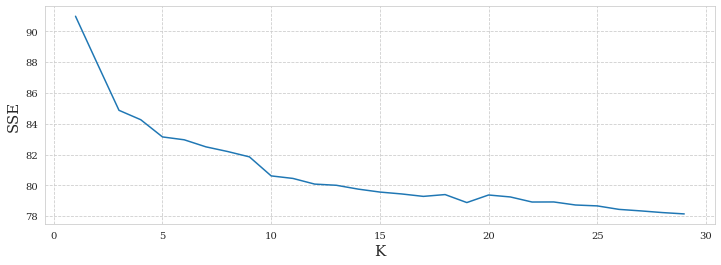

In [20]:
fig, ax1 = plt.subplots(figsize=(12,4))
t = np.arange(1,30,1)

ax1.set_ylabel("SSE")
ax1.set_xlabel('K')
ax1.plot(t, sse_sax)
ax1.tick_params(axis='y')

## SAX EUCLIDEAN

In [21]:
km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=100, random_state=42)
km.fit(df_sax)

TimeSeriesKMeans(max_iter=100, n_clusters=4, random_state=42)

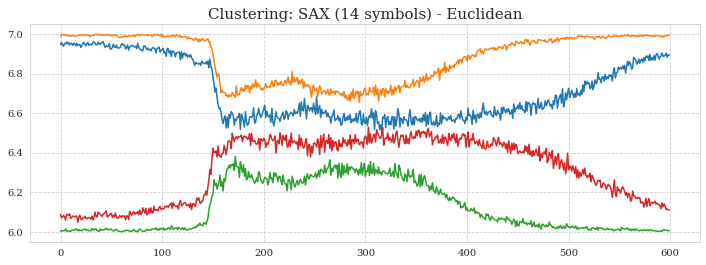

In [22]:
plt.figure(figsize=(12,4))
plt.title('Clustering: SAX (14 symbols) - Euclidean')
plt.plot(np.squeeze(km.cluster_centers_).T)
plt.show()

In [23]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km.labels_ == i)))

Cluster 0: 466
Cluster 1: 572
Cluster 2: 338
Cluster 3: 452


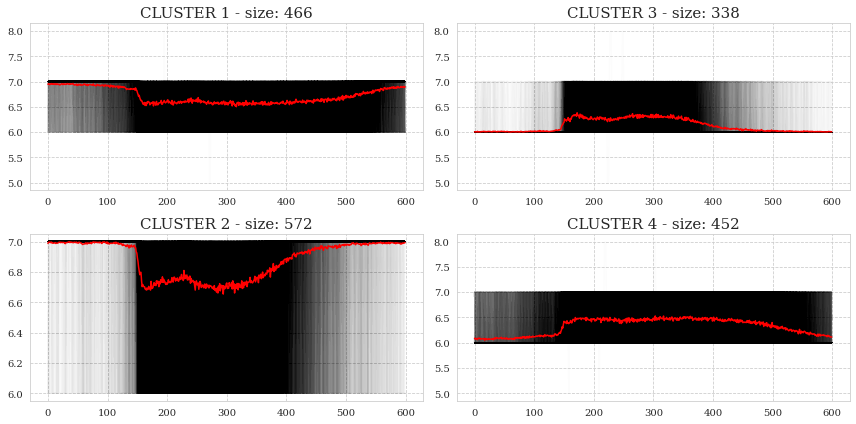

In [24]:
fig, ax = plt.subplots(2, 2,figsize=(12, 6))


ax[0, 0].set_title('CLUSTER 1 - size: 466')
ax[0, 0].plot(np.squeeze(df_sax[km.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km.cluster_centers_[0]).T, color='red')


ax[1, 0].set_title('CLUSTER 2 - size: 572')
ax[1, 0].plot(np.squeeze(df_sax[km.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km.cluster_centers_[1]).T, color='red')



ax[0, 1].set_title('CLUSTER 3 - size: 338')
ax[0, 1].plot(np.squeeze(df_sax[km.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km.cluster_centers_[2]).T, color='red')



ax[1, 1].set_title('CLUSTER 4 - size: 452')
ax[1, 1].plot(np.squeeze(df_sax[km.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km.cluster_centers_[3]).T, color='red')


fig.tight_layout()
plt.show()


In [25]:
sse_euclidean = km.inertia_
sse_euclidean

84.86909565662737

In [26]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_sax)

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_sax)

## PCA EUCLIDEAN

Text(0.5, 1.0, 'PCA Cluster 4')

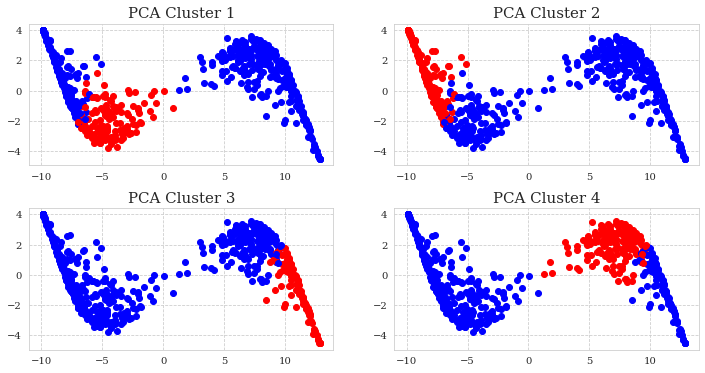

In [27]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km.labels_[i] == 2:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km.labels_[i] == 3:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 4')

## t-SNE EUCLIDEAN

Text(0.5, 1.0, 't-SNE Cluster 4')

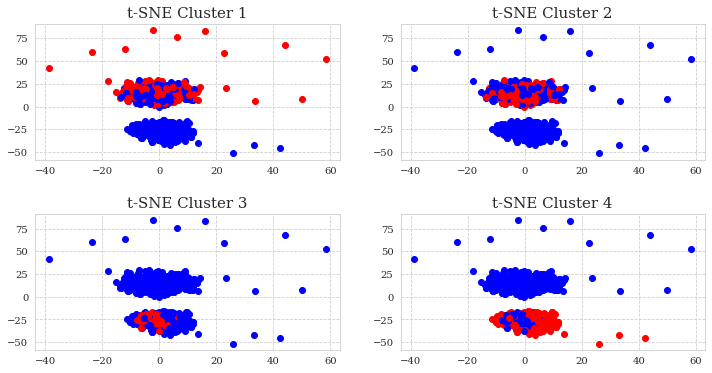

In [28]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km.labels_[i] == 2:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km.labels_[i] == 3:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 4')

## SAX DTW

In [29]:
km_dtw = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=100, random_state=42)
km_dtw.fit(df_sax)

TimeSeriesKMeans(max_iter=100, metric='dtw', n_clusters=4, random_state=42)

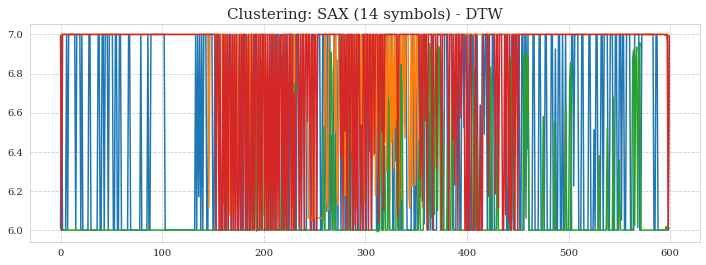

In [30]:
plt.figure(figsize=(12,4))
plt.title('Clustering: SAX (14 symbols) - DTW')
plt.plot(np.squeeze(km_dtw.cluster_centers_).T)
plt.show()

In [31]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km_dtw.labels_ == i)))

Cluster 0: 561
Cluster 1: 357
Cluster 2: 209
Cluster 3: 701


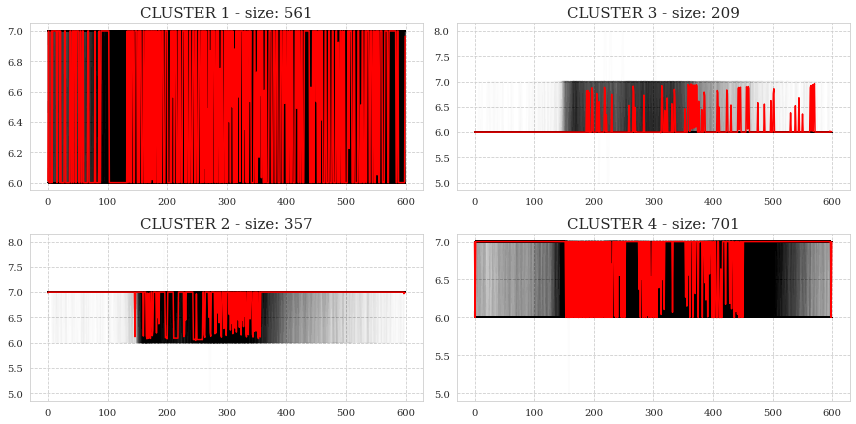

In [32]:
fig, ax = plt.subplots(2, 2,figsize=(12, 6))


ax[0, 0].set_title('CLUSTER 1 - size: 561')
ax[0, 0].plot(np.squeeze(df_sax[km_dtw.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km_dtw.cluster_centers_[0]).T, color='red')



ax[1, 0].set_title('CLUSTER 2 - size: 357')
ax[1, 0].plot(np.squeeze(df_sax[km_dtw.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km_dtw.cluster_centers_[1]).T, color='red')



ax[0, 1].set_title('CLUSTER 3 - size: 209')
ax[0, 1].plot(np.squeeze(df_sax[km_dtw.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km_dtw.cluster_centers_[2]).T, color='red')



ax[1, 1].set_title('CLUSTER 4 - size: 701')
ax[1, 1].plot(np.squeeze(df_sax[km_dtw.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km_dtw.cluster_centers_[3]).T, color='red')


fig.tight_layout()
plt.show()

In [33]:
sse_dtw = km_dtw.inertia_
sse_dtw

10.727093237185146

## PCA DTW

Text(0.5, 1.0, 'PCA Cluster 4')

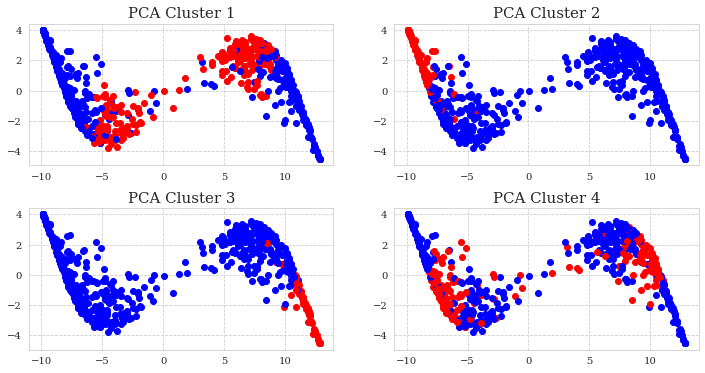

In [34]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 2:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 3:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 4')

## t-SNE DTW

Text(0.5, 1.0, 't-SNE Cluster 4')

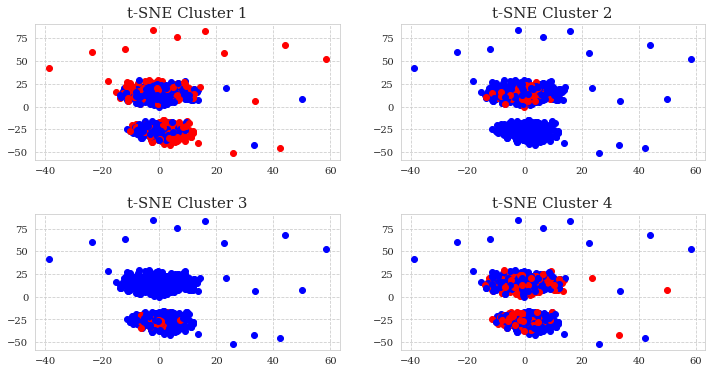

In [35]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 2:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km_dtw.labels_[i] == 3:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 4')

## SAX SAKOE CHIBA

In [36]:
km_sc = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"sakoe_chiba"}, max_iter=100, random_state=42)
km_sc.fit(df_sax)


TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba'},
                 n_clusters=4, random_state=42)

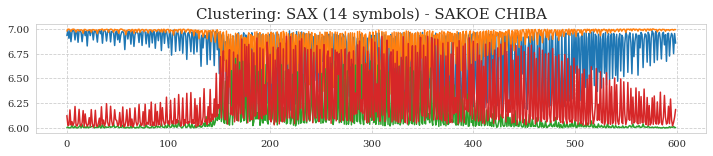

In [37]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (14 symbols) - SAKOE CHIBA')
plt.plot(np.squeeze(km_sc.cluster_centers_).T)
plt.show()

In [38]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km_sc.labels_ == i)))

Cluster 0: 403
Cluster 1: 637
Cluster 2: 346
Cluster 3: 442


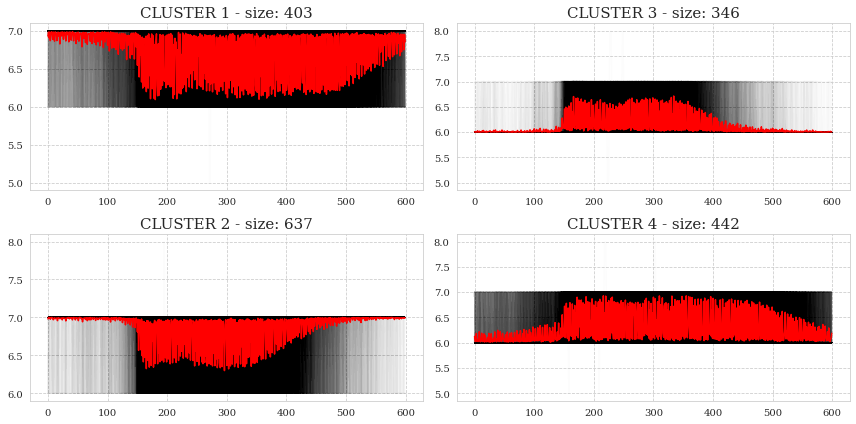

In [39]:
fig, ax = plt.subplots(2, 2,figsize=(12, 6))


ax[0, 0].set_title('CLUSTER 1 - size: 403')
ax[0, 0].plot(np.squeeze(df_sax[km_sc.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km_sc.cluster_centers_[0]).T, color='red')



ax[1, 0].set_title('CLUSTER 2 - size: 637')
ax[1, 0].plot(np.squeeze(df_sax[km_sc.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km_sc.cluster_centers_[1]).T, color='red')



ax[0, 1].set_title('CLUSTER 3 - size: 346')
ax[0, 1].plot(np.squeeze(df_sax[km_sc.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km_sc.cluster_centers_[2]).T, color='red')



ax[1, 1].set_title('CLUSTER 4 - size: 442')
ax[1, 1].plot(np.squeeze(df_sax[km_sc.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km_sc.cluster_centers_[3]).T, color='red')


fig.tight_layout()
plt.show()

In [40]:
sse_sc = km_sc.inertia_
sse_sc

58.846693295007874

## PCA SAKOE CHIBA

Text(0.5, 1.0, 'PCA Cluster 4')

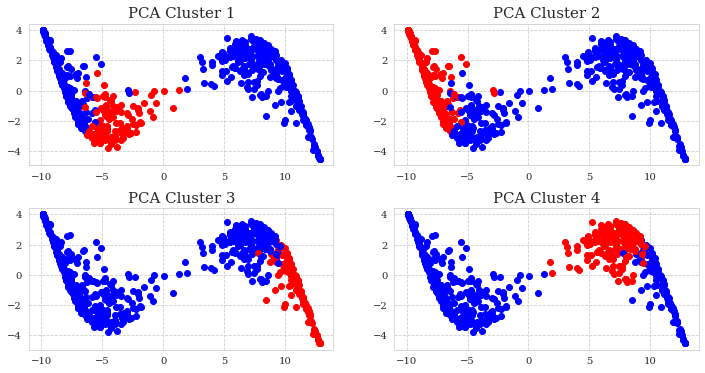

In [41]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 2:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 3:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 4')

## t-SNE SAKOE CHIBA

Text(0.5, 1.0, 't-SNE Cluster 4')

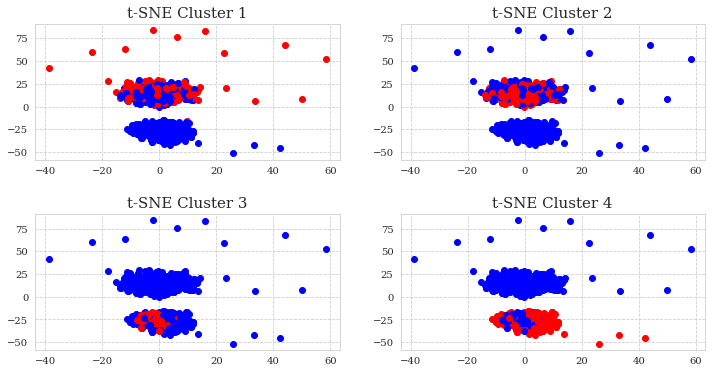

In [42]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 2:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km_sc.labels_[i] == 3:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 4')

## SAX ITAKURA

In [43]:
km_ip = TimeSeriesKMeans(n_clusters=4, metric="dtw", metric_params= {"global_constraint":"itakura"}, max_iter=100, random_state=42)
km_ip.fit(df_sax)



TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'itakura'}, n_clusters=4,
                 random_state=42)

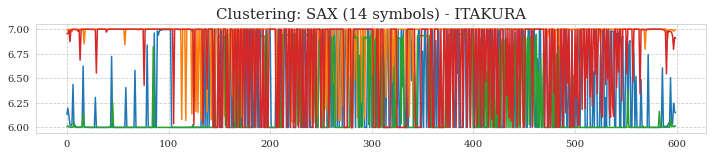

In [44]:
plt.figure(figsize=(12,2))
plt.title('Clustering: SAX (14 symbols) - ITAKURA')
plt.plot(np.squeeze(km_ip.cluster_centers_).T)
plt.show()

In [45]:
for i in range(4):
    print("Cluster {}: {}".format(i, sum(km_ip.labels_ == i)))

Cluster 0: 368
Cluster 1: 527
Cluster 2: 438
Cluster 3: 495


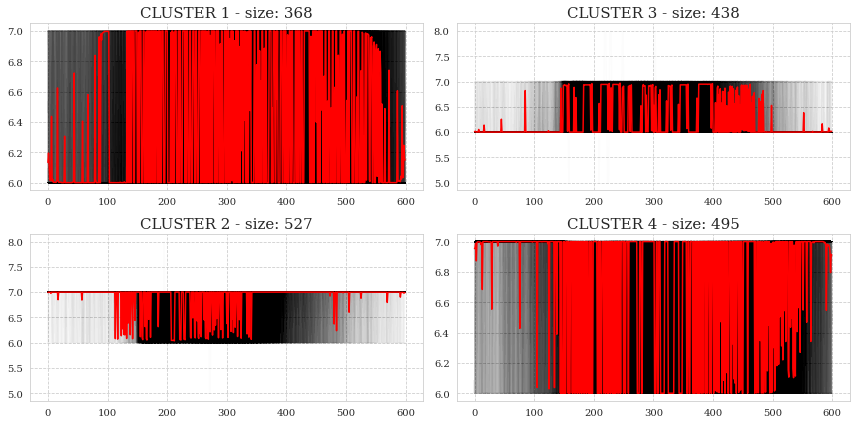

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))



ax[0, 0].set_title('CLUSTER 1 - size: 368')
ax[0, 0].plot(np.squeeze(df_sax[km_ip.labels_ == 0]).T,color='black', alpha=0.01)
ax[0, 0].plot(np.squeeze(km_ip.cluster_centers_[0]).T, color='red')



ax[1, 0].set_title('CLUSTER 2 - size: 527')
ax[1, 0].plot(np.squeeze(df_sax[km_ip.labels_ == 1]).T,color='black', alpha=0.01)
ax[1, 0].plot(np.squeeze(km_ip.cluster_centers_[1]).T, color='red')



ax[0, 1].set_title('CLUSTER 3 - size: 438')
ax[0, 1].plot(np.squeeze(df_sax[km_ip.labels_ == 2]).T,color='black', alpha=0.01)
ax[0, 1].plot(np.squeeze(km_ip.cluster_centers_[2]).T, color='red')



ax[1, 1].set_title('CLUSTER 4 - size: 495')
ax[1, 1].plot(np.squeeze(df_sax[km_ip.labels_ == 3]).T,color='black', alpha=0.01)
ax[1, 1].plot(np.squeeze(km_ip.cluster_centers_[3]).T, color='red')


fig.tight_layout()
plt.show()

In [47]:
sse_ip = km_ip.inertia_
sse_ip

17.229511464099467

## PCA ITAKURA

Text(0.5, 1.0, 'PCA Cluster 4')

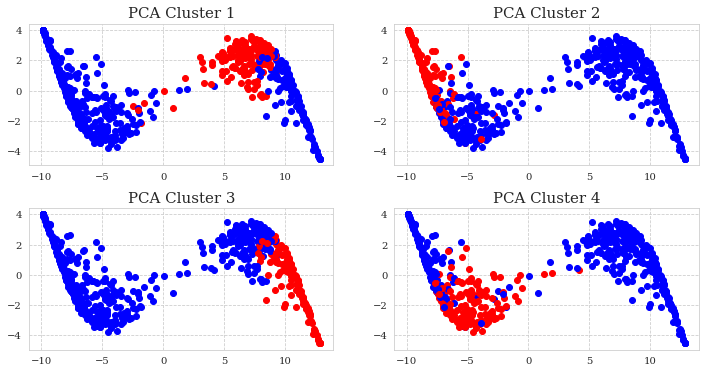

In [48]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 2:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 3:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 4')

## t-SNE ITAKURA

Text(0.5, 1.0, 't-SNE Cluster 4')

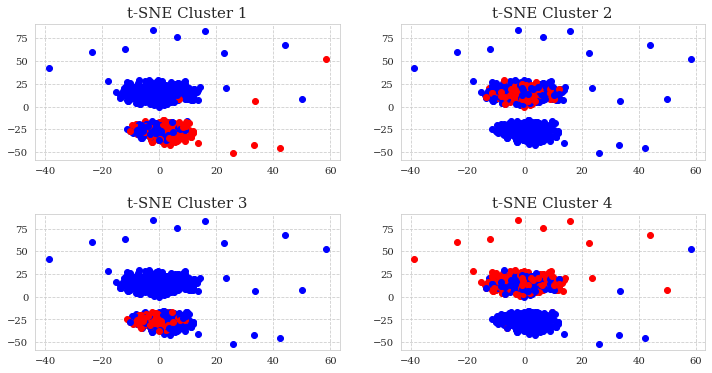

In [49]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')


plt.subplot(2, 2, 3)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 2:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 3)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 3')

plt.subplot(2, 2, 4)
for i in range(len(trasposta)):
    if km_ip.labels_[i] == 3:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 4)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 4')

## PAA

In [50]:
# PAA transform 
n_paa_segments = 600
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(df_train)
#ts_paa = paa.inverse_transform(ts_paa)
ts_paa = ts_paa.squeeze()
df_paa = pd.DataFrame(ts_paa, index=df_train.index)

/Users/blertalleshi/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


In [51]:
sse_paa=[]


max_k=30
for k in tqdm(range(2, max_k+1)):
    kmeans = TimeSeriesKMeans(n_clusters=k, metric='euclidean', max_iter=20, random_state=42, n_jobs=-1)
    kmeans.fit(df_paa)
   
    sse = kmeans.inertia_

    sse_paa.append(sse) 

100%|██████████| 29/29 [00:24<00:00,  1.19it/s]


In [52]:
print(sse_paa)

[0.008850010604894435, 0.007837504972029227, 0.007672549688179008, 0.007326119298323724, 0.007168257985795179, 0.0069668804243513465, 0.006801290534649984, 0.006384695897878391, 0.006304438533241895, 0.00616453062211594, 0.005966116356724792, 0.005936597525804254, 0.00575221778650681, 0.005630788527218941, 0.005455935874913011, 0.005356987832479943, 0.005307379187649741, 0.005256085404800877, 0.0051507329702116175, 0.005140875715128135, 0.005032354256536122, 0.004922854398050037, 0.004839037876250876, 0.00476240062714025, 0.0047253041076572005, 0.004673020229870752, 0.0046429906223702955, 0.0045842968087341385, 0.004535329814366239]


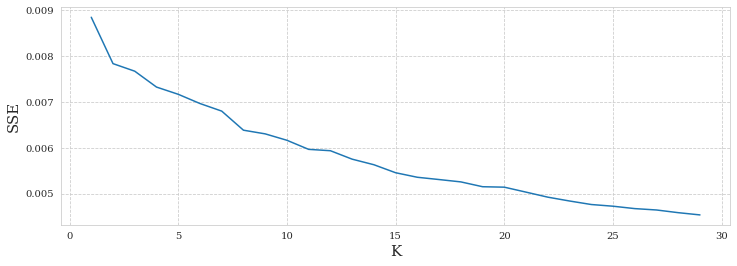

In [53]:
fig, ax1 = plt.subplots(figsize=(12,4))
t = np.arange(1,30,1)

ax1.set_ylabel("SSE")
ax1.set_xlabel('K')
ax1.plot(t, sse_paa)
ax1.tick_params(axis='y')

## PAA EUCLIDEAN

In [54]:
km_paa = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=100, random_state=42)
km_paa.fit(df_paa)

TimeSeriesKMeans(max_iter=100, n_clusters=2, random_state=42)

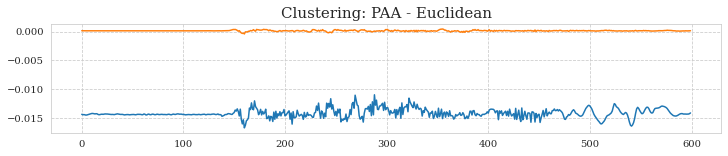

In [55]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - Euclidean')
plt.plot(np.squeeze(km_paa.cluster_centers_).T)
plt.show()

In [56]:
for i in range(2):
    print("Cluster {}: {}".format(i, sum(km_paa.labels_ == i)))

Cluster 0: 18
Cluster 1: 1810


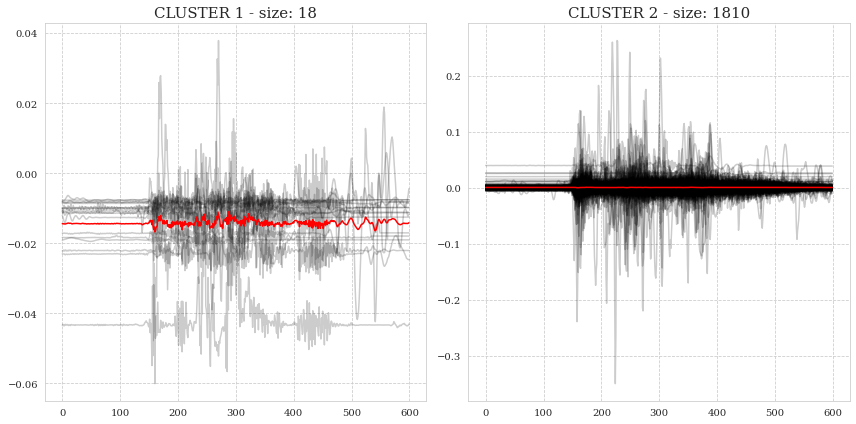

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].set_title('CLUSTER 1 - size: 18')
ax[0].plot(np.squeeze(df_paa[km_paa.labels_ == 0]).T,color='black', alpha=0.2)
ax[0].plot(np.squeeze(km_paa.cluster_centers_[0]).T, color='red')



ax[1].set_title('CLUSTER 2 - size: 1810')
ax[1].plot(np.squeeze(df_paa[km_paa.labels_ == 1]).T,color='black', alpha=0.2)
ax[1].plot(np.squeeze(km_paa.cluster_centers_[1]).T, color='red')



fig.tight_layout()
plt.show()

In [58]:
sse_paa= km_paa.inertia_
sse_paa

0.008850010604894435

## PCA EUCLIDEAN

Text(0.5, 1.0, 'PCA Cluster 2')

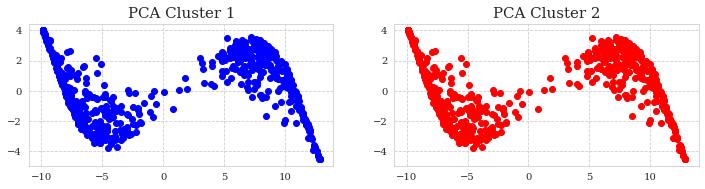

In [59]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta_paa = (df_paa).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')



## t-SNE EUCLIDEAN

Text(0.5, 1.0, 't-SNE Cluster 2')

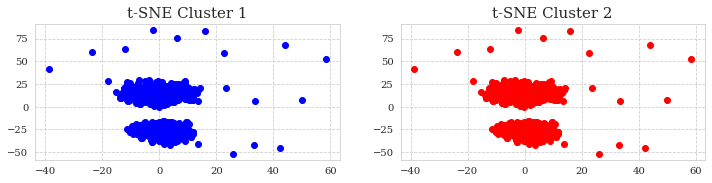

In [60]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta_paa = (df_sax).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')


## PAA DTW

In [61]:
km_paa_dtw = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=100, random_state=42)
km_paa_dtw.fit(df_paa)



TimeSeriesKMeans(max_iter=100, metric='dtw', n_clusters=2, random_state=42)

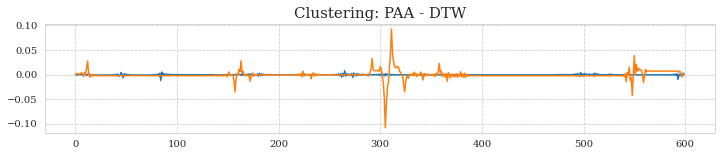

In [62]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - DTW')
plt.plot(np.squeeze(km_paa_dtw.cluster_centers_).T)
plt.show()

In [63]:
for i in range(2):
    print("Cluster {}: {}".format(i, sum(km_paa_dtw.labels_ == i)))

Cluster 0: 1755
Cluster 1: 73


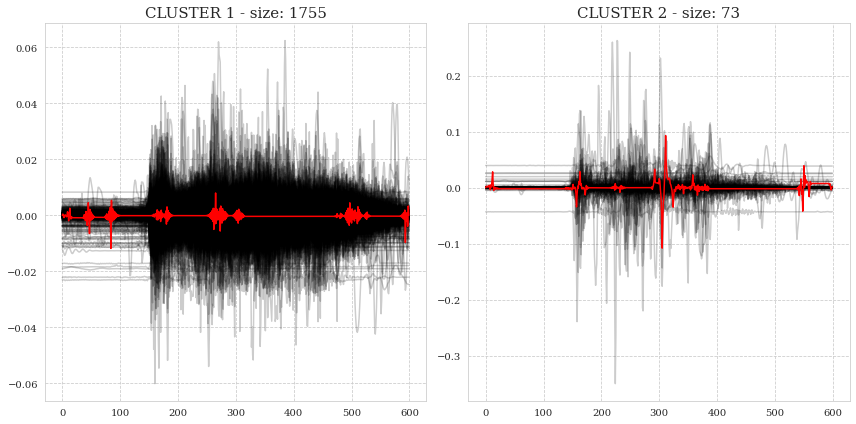

In [182]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6))


ax[0].set_title('CLUSTER 1 - size: 1755')
ax[0].plot(np.squeeze(df_paa[km_paa_dtw.labels_ == 0]).T,color='black', alpha=0.2)
ax[0].plot(np.squeeze(km_paa_dtw.cluster_centers_[0]).T, color='red')



ax[1].set_title('CLUSTER 2 - size: 73')
ax[1].plot(np.squeeze(df_paa[km_paa_dtw.labels_ == 1]).T,color='black', alpha=0.2)
ax[1].plot(np.squeeze(km_paa_dtw.cluster_centers_[1]).T, color='red')



fig.tight_layout()
plt.show()

In [183]:
sse_paa_dtw= km_paa_dtw.inertia_
sse_paa_dtw

0.003751507189650273

## PCA DTW

Text(0.5, 1.0, 'PCA Cluster 2')

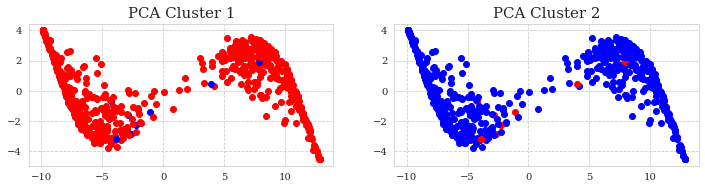

In [66]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta_paa = (df_paa).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa_dtw.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa_dtw.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')


## t-SNE DTW

Text(0.5, 1.0, 't-SNE Cluster 2')

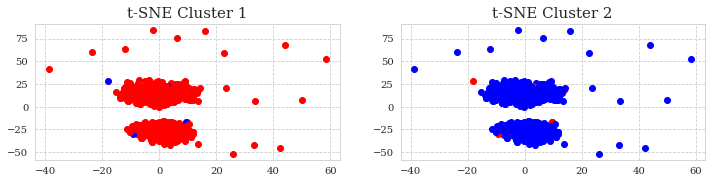

In [67]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta_paa = (df_paa).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa_dtw.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa_dtw.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')

## PAA SAKOE CHIBA

In [68]:
km_paa_sc = TimeSeriesKMeans(n_clusters=2, metric="dtw", metric_params= {"global_constraint":"sakoe_chiba"}, max_iter=100, random_state=42)
km_paa_sc.fit(df_paa)



TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'sakoe_chiba'},
                 n_clusters=2, random_state=42)

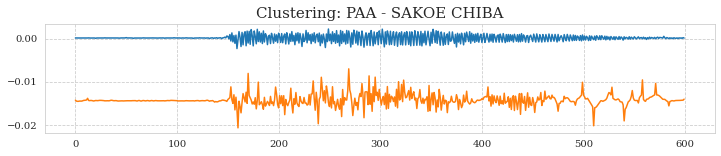

In [69]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - SAKOE CHIBA')
plt.plot(np.squeeze(km_paa_sc.cluster_centers_).T)
plt.show()

In [70]:
for i in range(2):
    print("Cluster {}: {}".format(i, sum(km_paa_sc.labels_ == i)))

Cluster 0: 1810
Cluster 1: 18


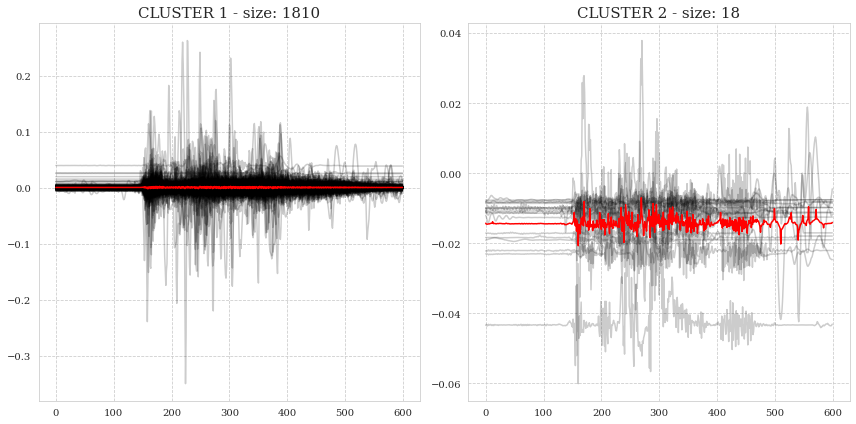

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].set_title('CLUSTER 1 - size: 1810')
ax[0].plot(np.squeeze(df_paa[km_paa_sc.labels_ == 0]).T,color='black', alpha=0.2)
ax[0].plot(np.squeeze(km_paa_sc.cluster_centers_[0]).T, color='red')



ax[1].set_title('CLUSTER 2 - size: 18')
ax[1].plot(np.squeeze(df_paa[km_paa_sc.labels_ == 1]).T,color='black', alpha=0.2)
ax[1].plot(np.squeeze(km_paa_sc.cluster_centers_[1]).T, color='red')



fig.tight_layout()
plt.show()

In [72]:
sse_paa_sc= km_paa_sc.inertia_
sse_paa_sc

0.008415372118205764

## PCA SAKOE CHIBA

Text(0.5, 1.0, 'PCA Cluster 2')

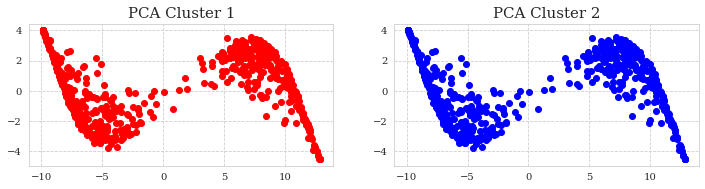

In [73]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta_paa = (df_paa).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa_sc.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa_sc.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')

## t-SNE SAKOE CHIBA

Text(0.5, 1.0, 't-SNE Cluster 2')

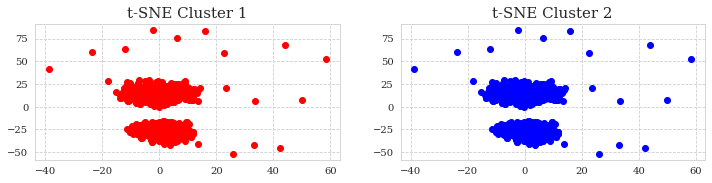

In [74]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta_paa = (df_paa).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa_sc.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa_sc.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')

## PAA ITAKURA

In [75]:
km_paa_ip = TimeSeriesKMeans(n_clusters=2, metric="dtw", metric_params= {"global_constraint":"itakura"}, max_iter=100, random_state=42)
km_paa_ip.fit(df_paa)



TimeSeriesKMeans(max_iter=100, metric='dtw',
                 metric_params={'global_constraint': 'itakura'}, n_clusters=2,
                 random_state=42)

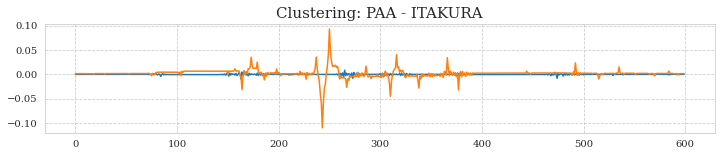

In [76]:
plt.figure(figsize=(12,2))
plt.title('Clustering: PAA - ITAKURA')
plt.plot(np.squeeze(km_paa_ip.cluster_centers_).T)
plt.show()

In [77]:
for i in range(2):
    print("Cluster {}: {}".format(i, sum(km_paa_ip.labels_ == i)))

Cluster 0: 1755
Cluster 1: 73


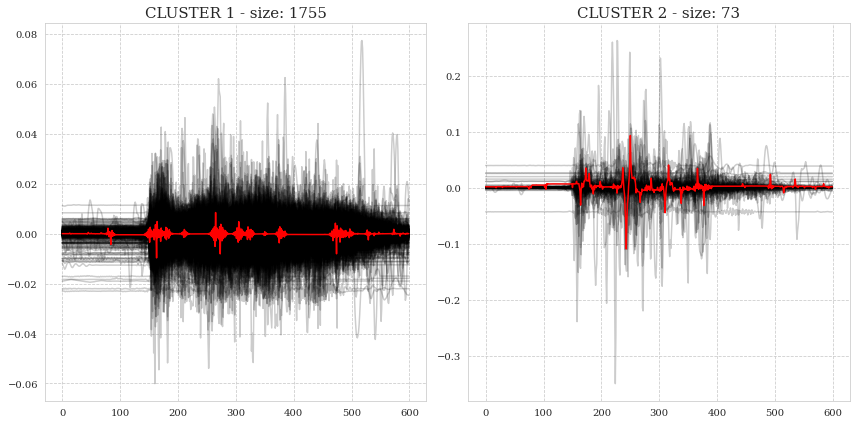

In [78]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6))


ax[0].set_title('CLUSTER 1 - size: 1755')
ax[0].plot(np.squeeze(df_paa[km_paa_ip.labels_ == 0]).T,color='black', alpha=0.2)
ax[0].plot(np.squeeze(km_paa_ip.cluster_centers_[0]).T, color='red')



ax[1].set_title('CLUSTER 2 - size: 73')
ax[1].plot(np.squeeze(df_paa[km_paa_ip.labels_ == 1]).T,color='black', alpha=0.2)
ax[1].plot(np.squeeze(km_paa_ip.cluster_centers_[1]).T, color='red')



fig.tight_layout()
plt.show()

In [79]:
sse_paa_ip= km_paa_ip.inertia_
sse_paa_ip

0.004903789418356609

## PCA ITAKURA

Text(0.5, 1.0, 'PCA Cluster 2')

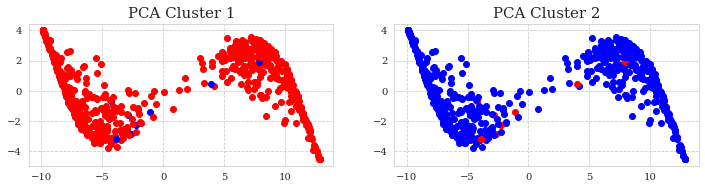

In [80]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)

trasposta_paa = (df_paa).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa_ip.labels_[i] == 0:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa_ip.labels_[i] == 1:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(pca_result[i, 0], pca_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('PCA Cluster 2')

## t-SNE ITAKURA

Text(0.5, 1.0, 't-SNE Cluster 2')

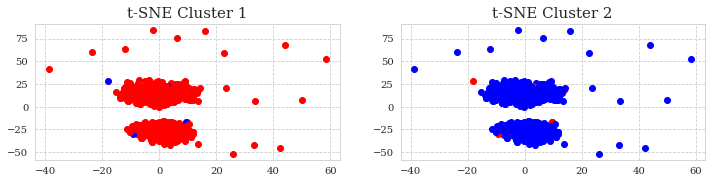

In [81]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.4)

trasposta_paa = (df_paa).T

plt.subplot(2, 2, 1)
for i in range(len(trasposta_paa)):
    if km_paa_ip.labels_[i] == 0:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 1)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 1')

              
plt.subplot(2, 2, 2)
for i in range(len(trasposta_paa)):
    if km_paa_ip.labels_[i] == 1:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'ro', label=f'Time Series {i} (Cluster 2)')
    else:
        plt.plot(tsne_result[i, 0], tsne_result[i, 1], 'bo', label=f'Time Series {i}')
plt.title('t-SNE Cluster 2')